### Dicussion Related With Outliers And Impact On Machine Learning

#### Which Machine learning Models Are Sensitive To Outliers
1. Naive Bayes Classifier ?--- Not Sensitive to the Outliers
2. SVM -------      ---------- Not sensitive to outliers
3. Linear Regression --------- sensitive to outliers
4. Logistic Regression ------- sensitive to outliers
5. Decision Tree Regressor or Classifier -- Not sensitive
6. Ensemble(RF, XGboost, GB) --- Not sensitive
7. KNN    ---------------------- Not sensitive
8. KMeans ---------------------- sensitive
9. Hierarichal ----------------- sensitive
10. PCA  ----------------------- sensitive
11. Neural Networks ------------ sensitive

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df['Age'].isnull().sum()

177

In [5]:
import seaborn as sns

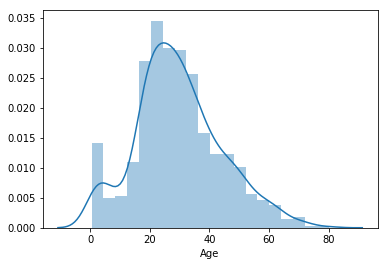

In [6]:
sns.distplot(df['Age'].dropna())

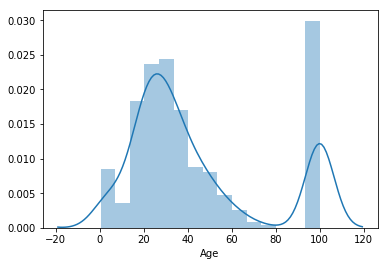

In [7]:
sns.distplot(df['Age'].fillna(100))

In [8]:
import matplotlib.pyplot as plt

### Guassian Distributed

Text(0, 0.5, 'No of passengers')

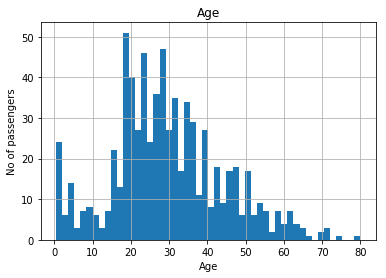

In [9]:
figure = df.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

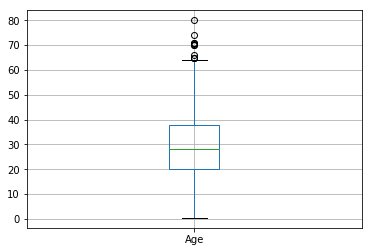

In [10]:
figure=df.boxplot(column='Age')

In [11]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### IF The Data Is Normally Distributed We Use This

##### Assume Age follows A Gaussian Distribution we will calculate the boundries which differentiate the outlier

In [12]:
upper_boundary = df['Age'].mean()+3*df['Age'].std()
lower_boundary = df['Age'].mean()-3*df['Age'].std()

In [13]:
print(upper_boundary)
print(lower_boundary)
print(df['Age'].mean())

73.27860964406095
-13.88037434994331
29.69911764705882


### Features Are Skewed We Use Below Technique

Text(0, 0.5, 'No of passengers')

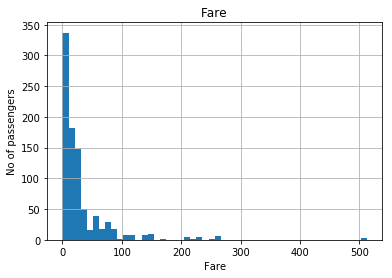

In [21]:
figure = df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

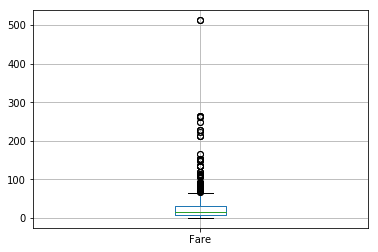

In [22]:
figure = df.boxplot(column="Fare")

In [23]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [25]:
# Lets compute the Interquantile range to calculate the boundries
IQR = df.Fare.quantile(0.75)-df.Fare.quantile(0.25)

In [26]:
IQR

23.0896

In [27]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge)
print(upper_bridge)

-26.724
65.6344


In [28]:
# Extreme outliers

lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge)
print(upper_bridge)

-61.358399999999996
100.2688


In [29]:
data = df.copy()

In [30]:
data.loc[data['Age']>=73,'Age']=73

In [32]:
data.loc[data['Fare']>=100,'Fare']=100

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Text(0, 0.5, 'No of passengers')

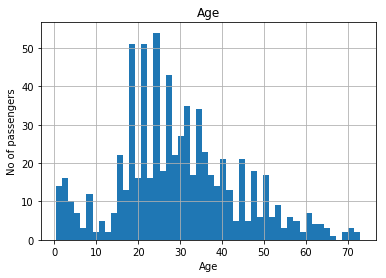

In [36]:
figure = data.Age.hist(bins=50)
figure.set_title('Age')
figure.set_xlabel('Age')
figure.set_ylabel('No of passengers')

Text(0, 0.5, 'No of passengers')

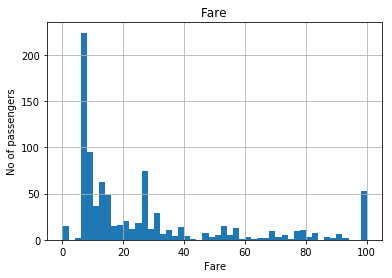

In [37]:
figure = data.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passengers')

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [40]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) 

In [43]:
from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score: 0.6716417910447762
roc_auc_score: 0.7064083020637899


In [48]:
## RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier()
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict_proba(X_test) 

In [49]:
from sklearn.metrics import accuracy_score,roc_auc_score
print('accuracy_score: {}'.format(accuracy_score(y_test,y_pred)))
print('roc_auc_score: {}'.format(roc_auc_score(y_test,y_pred1[:,1])))

accuracy_score: 0.6604477611940298
roc_auc_score: 0.7043562382739212
